In [1]:
#Imports
from qiskit import *
from qiskit.tools import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.tools.jupyter
from math import *
from random import randint
# Loading your IBM Quantum account(s)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()
backend = provider.get_backend('ibmq_belem')

In [2]:
#Creating the cccz gate    
qc = QuantumCircuit(4)
qc.cp(pi/4, 0, 3)
qc.cx(0,1)
qc.cp(-pi/4, 1, 3)
qc.cx(0,1)
qc.cp(pi/4, 1, 3)
qc.cx(1,2)
qc.cp(-pi/4, 2, 3)
qc.cx(0,2)
qc.cp(pi/4, 2, 3)
qc.cx(1,2)
qc.cp(-pi/4, 2, 3)
qc.cx(0,2)
qc.cp(pi/4, 2, 3)
cccz = qc.to_gate(label = "cccz")
    
#Create the Oracle
def oracle(Quantum_Circuit, binary):
    reversed_num = binary[::-1]
    for i in range(4):
        if reversed_num[i] == "0":
            Quantum_Circuit.x(i)
    Quantum_Circuit.append(cccz, [0,1,2,3])
    for i in range(4):
        if reversed_num[i] == "0":
            Quantum_Circuit.x(i)
    Quantum_Circuit.barrier([0,1,2,3])

#Amplitude Amplification
def amplification(Quantum_Circuit):
    Quantum_Circuit.h([0,1,2,3]) 
    Quantum_Circuit.x([0,1,2,3]) 
    Quantum_Circuit.append(cccz, [0,1,2,3])
    Quantum_Circuit.x([0,1,2,3]) 
    Quantum_Circuit.h([0,1,2,3]) 

#Job executuion function to manipulate how many times it is run
def execute_job(number_of_times, num):
    sum_true = 0
    for i in range(number_of_times):
        simulator = Aer.get_backend('qasm_simulator')
        job = execute(trans_circuit, backend=simulator, shots=10)
        counts = job.result().get_counts()
        if counts.most_frequent() == num:
            sum_true += 1
    print(sum_true, "out of", number_of_times, 'times ,', num, 'was the most frequent return value')
    

Enter a value between 0 and 15: 
Number selected was: 0
In binary, that is:  0000


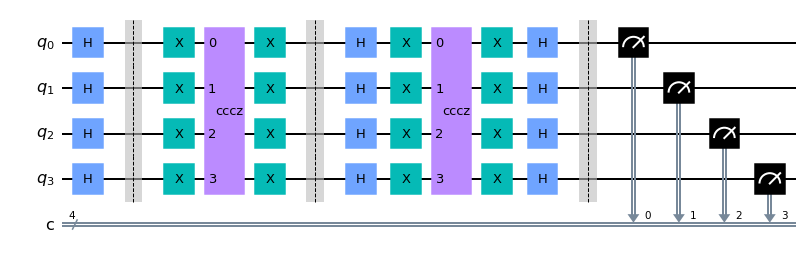

In [8]:
#Ask for an input (will be done by HPC)
print('Enter a value between 0 and 15: ')

#Converting the base ten number to binary
dec = randint(0,15)
print("Number selected was:", dec)
num = bin(dec).replace("0b", "")

#Making there be four bits
placeholder = num[::-1]
while len(placeholder) < 4:
    placeholder += "0"
num = placeholder[::-1]
print("In binary, that is: ", num)
##########
circuit = QuantumCircuit(4, 4)

#Initialization
circuit.h([0,1,2,3]) 
circuit.barrier([0,1,2,3])

#Oracle and Amplification

oracle(circuit, num)
amplification(circuit)
circuit.barrier([0,1,2,3])

#Measures
circuit.measure([0,1,2,3],[0,1,2,3])

#Draw
circuit.draw(output = 'mpl', justify = 'left', initial_state = True)

#Transpile
trans_circuit = transpile(circuit, basis_gates = ['u', 'cx'])
#trans_circuit.draw(output = 'mpl')
circuit.draw(output = 'mpl')

In [77]:
#Getting the results with a real QC
#
job = backend.run(transpile(circuit, backend=backend), shots=1024)
print(job.job_id())
job_monitor(job)

62b4ac267476721104ea4449
Job Status: job is queued (2)     

KeyboardInterrupt: 

In [61]:
#retrieve previously-run job
job = backend.retrieve_job(job.job_id()) 
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plot_histogram(job.result().get_counts())

{'1001': 6, '1011': 4, '0011': 6, '0001': 5, '1110': 5, '1000': 6, '1101': 6, '1111': 7, '0111': 8, '0101': 3, '1010': 8, '0110': 920, '1100': 1, '0100': 4, '0000': 9, '0010': 2}


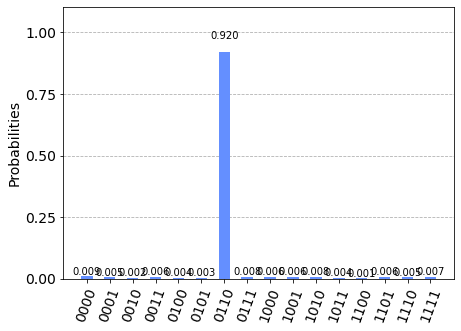

In [4]:
#For running on a simulator
from qiskit import BasicAer, Aer, execute
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=1000)
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)

In [83]:
execute_job(100, num)

100 out of 100 times , 1111 was the most frequent return value


In [3]:
import numpy as np
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)
result = job.result()
sv = result.get_statevector()
print(sv)

NameError: name 'circuit' is not defined